# Titanic Survival

In [31]:
# Notwendige Bibliotheken importieren
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [32]:
# Lade die Daten
train = pd.read_csv('train.csv')

In [33]:
train.head()  

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [34]:
# Vereinfachtes Feature-Engineering
train['Has_Cabin'] = train["Cabin"].apply(lambda x: 0 if type(x) == float else 1)
train['FamilySize'] = train['SibSp'] + train['Parch'] + 1
train['IsAlone'] = (train['FamilySize'] == 1).astype(int)

# Verwenden Sie Zuweisung anstelle von inplace=True, um FutureWarnings zu vermeiden
train['Age'] = train['Age'].fillna(train['Age'].median())
train['Embarked'] = train['Embarked'].fillna('S')

# Verwendung von .fillna() mit Zuweisung für 'Fare'
train['Fare'] = train['Fare'].fillna(train['Fare'].mean())

# Zuordnung kategorischer Variablen zu ganzen Zahlen
train['Sex'] = train['Sex'].map({'male': 1, 'female': 0}).astype(int)
embarked_mapping = {'S': 0, 'C': 1, 'Q': 2}
train['Embarked'] = train['Embarked'].map(embarked_mapping).astype(int)

In [35]:
# Vorbereiten der Daten für die Modellierung
X = train.drop(['Survived', 'Name', 'Ticket', 'Cabin', 'PassengerId'], axis=1)
y = train['Survived']

In [36]:
# Aufteilung der Daten in Trainings- und Testsätze
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Classifiers

In [37]:
#importing further classification models 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [38]:
# Defining the  models
# Instead of classifying the problem just with DT, I took another approach inspired from the Wine Quality Dataset and used 3 another classifiers like LR, KNN and SVC


models = {
    'Decision Tree': tree.DecisionTreeClassifier(max_depth=3),
    'Logistic Regression': LogisticRegression(solver='liblinear'),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
    'Support Vector Classifier': SVC(probability=True)  # Enable probability estimates for SVC
}

In [39]:
# Training each Model

for model_name, model in models.items():
    model.fit(X_train, y_train)
    print(f"{model_name} trained successfully.")

Decision Tree trained successfully.
Logistic Regression trained successfully.
K-Nearest Neighbors trained successfully.
Support Vector Classifier trained successfully.


# Classification Metrics

In [42]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, roc_auc_score

In [62]:
# Initializing dictionary to store results
results = {}

# Evaluating each model
for model_name, model in models.items():
    y_pred = model.predict(X_test)
    y_scores = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None  # Check for probability output

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='binary')
    recall = recall_score(y_test, y_pred, average='binary')
    f1 = f1_score(y_test, y_pred, average='binary')
    roc_auc = roc_auc_score(y_test, y_scores) if y_scores is not None else 'N/A'

    # Save results
    results[model_name] = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1 Score': f1, 'ROC-AUC': roc_auc}

    # Print results
    print(f"\n{model_name} Metrics:")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")
    print(f"ROC-AUC: {roc_auc if roc_auc != 'N/A' else 'Not Available'}")


Decision Tree Metrics:
Accuracy: 0.80
Precision: 0.80
Recall: 0.69
F1 Score: 0.74
ROC-AUC: 0.8359073359073361

Logistic Regression Metrics:
Accuracy: 0.80
Precision: 0.77
Recall: 0.73
F1 Score: 0.75
ROC-AUC: 0.8848133848133848

K-Nearest Neighbors Metrics:
Accuracy: 0.71
Precision: 0.69
Recall: 0.54
F1 Score: 0.61
ROC-AUC: 0.7885456885456886

Support Vector Classifier Metrics:
Accuracy: 0.66
Precision: 0.76
Recall: 0.26
F1 Score: 0.38
ROC-AUC: 0.8190476190476191


# Organizing the Result

In [68]:
#organizing the Result in Dataframe for comparing the metrics side by side
results_df = pd.DataFrame(results)
results_df

,Decision Tree,Logistic Regression,K-Nearest Neighbors,Support Vector Classifier
Accuracy,0.798883,0.798883,0.709497,0.659218
Precision,0.796875,0.771429,0.689655,0.760000
Recall,0.689189,0.729730,0.540541,0.256757
F1 Score,0.739130,0.750000,0.606061,0.383838
ROC-AUC,0.835907,0.884813,0.788546,0.819048


# Reading the Results
1. Decision Tree
* This model has a balanced performance across metrics, with accuracy, precision, recall, and F1-score hovering around 0.70-0.80.
* The ROC-AUC score (0.84) indicates that the Decision Tree does well in distinguishing between classes, even slightly outperforming its accuracy and recall.
* Recall (0.69) is slightly lower than other metrics, suggesting that it may miss some positive cases (e.g., "Survived" cases) relative to the total number of true positives.
2. Logistic Regression
* This model has a strong balance between precision (0.77) and recall (0.73), with an F1-score of 0.75, indicating a well-rounded performance.
* The ROC-AUC (0.88) is the highest among all models, indicating that Logistic Regression is best at distinguishing between the positive and negative classes. It maintains high recall, meaning it captures most positive cases.
* Given its robust balance across metrics and especially the high ROC-AUC, Logistic Regression appears to be a strong candidate, especially if probability predictions are essential.
3. K-Nearest Neighbors (KNN)
* This model has a relatively lower performance overall, with accuracy (0.71), precision (0.69), and recall (0.54) showing it struggles to generalize well.
* The low recall (0.54) and F1-score (0.61) indicate that KNN is not capturing a significant number of positive cases, likely due to limitations with high-dimensional data or imbalanced class distributions.
* KNN may not be ideal for this task, as it’s missing many positive cases (low recall) and has a relatively low ROC-AUC (0.79).
4. Support Vector Classifier (SVC)
* SVC has low recall (0.26) and F1-score (0.38), suggesting it’s capturing very few positive cases.
* Precision (0.76) is relatively high, meaning that, when SVC does predict a positive class, it is often correct.
* The very low recall (0.26) indicates that SVC is heavily biased toward predicting the negative class, making it less effective in capturing the positive class, which is further confirmed by a lower accuracy (0.66).
* SVC may not be suitable for this task, especially if capturing positive cases is essential.

# Summary

* Logistic Regression and the Decision Tree perform the best overall, with Logistic Regression showing a slight edge due to its high ROC-AUC and balanced precision-recall.
* KNN and SVC have limitations, particularly in recall, indicating these models may miss a large number of positive cases and therefore might not be the best fit.

### Visualizing Confusion Matrices

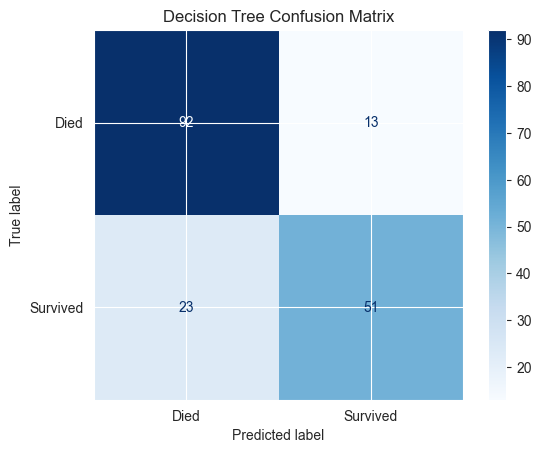

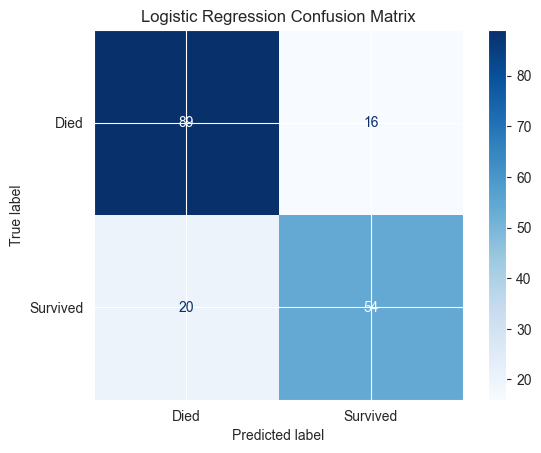

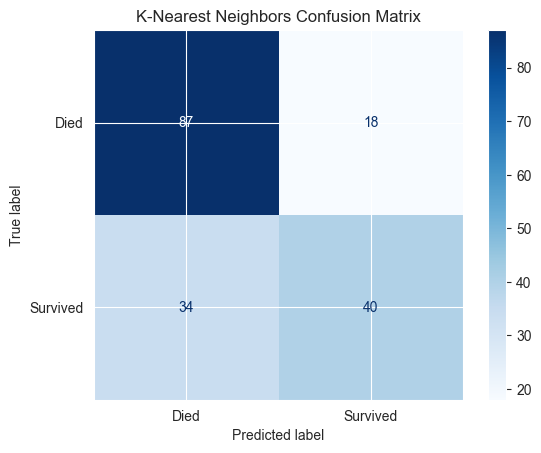

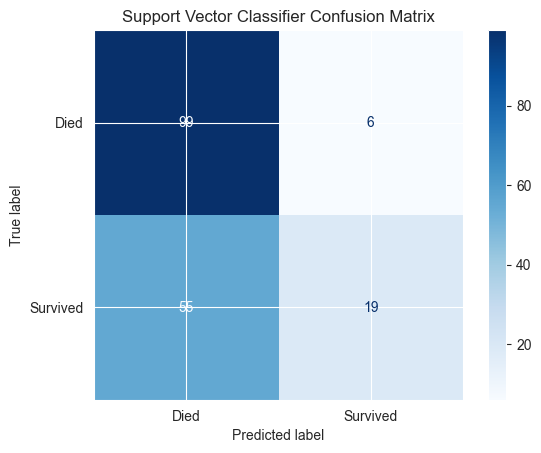

In [69]:
from sklearn.metrics import ConfusionMatrixDisplay

for model_name, model in models.items():
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Died', 'Survived'])
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'{model_name} Confusion Matrix')
    plt.show()

### Classification Report

In [70]:
# Print the classification report for each model
for model_name, model in models.items():
    print(f"\n{model_name} Classification Report:")
    print(classification_report(y_test, y_pred, target_names=['Died', 'Survived']))


Decision Tree Classification Report:
              precision    recall  f1-score   support

        Died       0.64      0.94      0.76       105
    Survived       0.76      0.26      0.38        74

    accuracy                           0.66       179
   macro avg       0.70      0.60      0.57       179
weighted avg       0.69      0.66      0.61       179


Logistic Regression Classification Report:
              precision    recall  f1-score   support

        Died       0.64      0.94      0.76       105
    Survived       0.76      0.26      0.38        74

    accuracy                           0.66       179
   macro avg       0.70      0.60      0.57       179
weighted avg       0.69      0.66      0.61       179


K-Nearest Neighbors Classification Report:
              precision    recall  f1-score   support

        Died       0.64      0.94      0.76       105
    Survived       0.76      0.26      0.38        74

    accuracy                           0.66       179
  

# Summary

The classification reports show that all models—**Decision Tree, Logistic Regression, KNN, and SVC**—have similar results:

1. **Class Imbalance**: High recall and F1-scores for the "Died" class (0.94 recall), but **low recall** for "Survived" (0.26), indicating the models struggle to correctly identify the "Survived" class.

2. **Model Performance Consistency**: All models are heavily biased towards predicting "Died," with similar metrics across models, suggesting limitations due to class imbalance or insufficient feature differentiation.

3. **Recommendations**:
   - **Class Balancing**: Use techniques like SMOTE or class weighting to improve recall for "Survived."
   - **Ensemble Models & Tuning**: Consider ensemble methods (e.g., Random Forests, boosting) and hyperparameter tuning to better handle class imbalance.
   - **Enhanced Feature Engineering**: Identify or engineer features that may more effectively capture the "Survived" class characteristics.
      
     ### (First two Recommendations are currently beyond the scope for us!!!)

# ROC Curve Analysis and Threshold Tuning

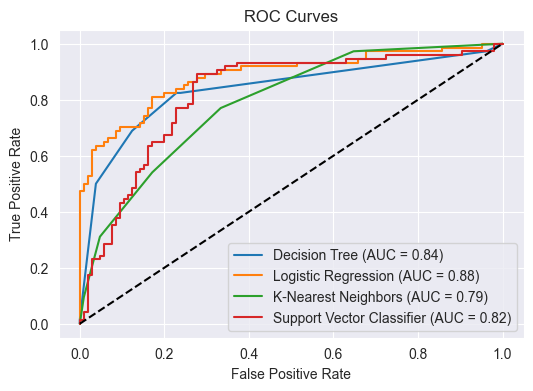

In [76]:
plt.figure(figsize=(6, 4))
for model_name, model in models.items():
    if hasattr(model, "predict_proba"):
        y_scores = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_scores)
        plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc_score(y_test, y_scores):.2f})')
    else:
        print(f"{model_name} does not support probability estimates, skipping ROC curve.")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc='lower right')
plt.show()